In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Muat dataset
url = ("convert_numeric.csv")
df = pd.read_csv(url, delimiter=",")
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,gender,marital_status,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,6,1,3,1169,4,1,4,1,3,...,2,67,1,1,2,1,1,1,1,1
1,2,48,3,3,5951,0,2,2,0,1,...,2,22,1,1,1,1,1,0,1,0
2,3,12,1,9,2096,0,3,2,1,3,...,2,49,1,1,1,3,2,0,1,1
3,0,42,3,7,7882,0,3,2,1,3,...,0,45,1,0,1,1,2,0,1,1
4,0,24,2,1,4870,0,2,3,1,3,...,3,53,1,0,2,1,2,0,1,0


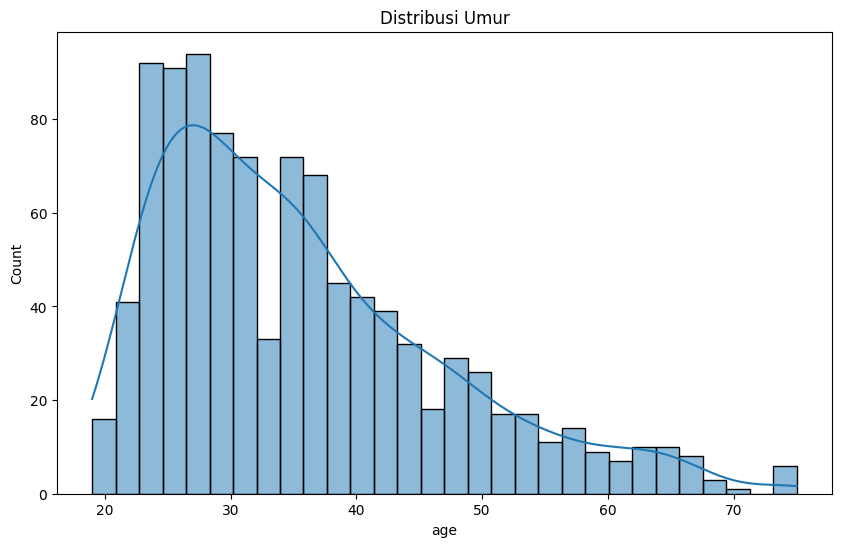

In [3]:
# Distribusi umur
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribusi Umur')
plt.show()

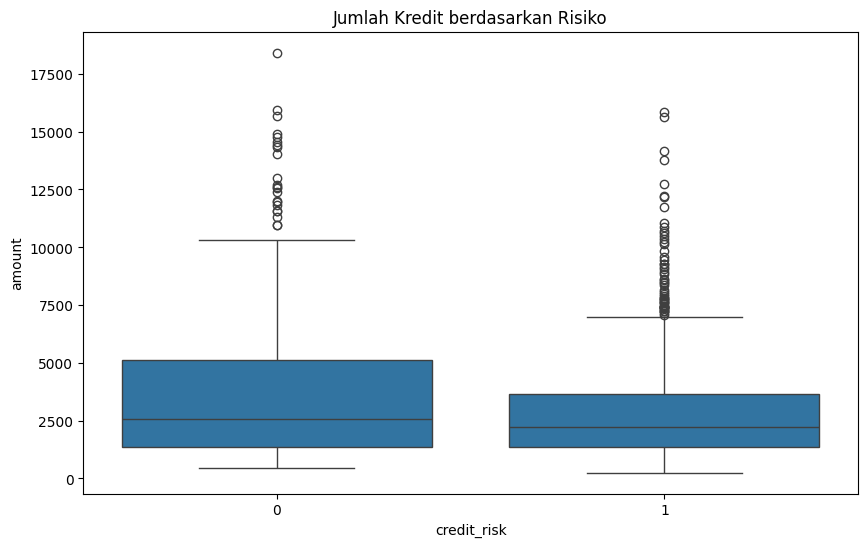

In [4]:
# Boxplot jumlah kredit berdasarkan risiko
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_risk', y='amount', data=df)
plt.title('Jumlah Kredit berdasarkan Risiko')
plt.show()

Memeriksa dan Menangani Nilai Hilang:

In [5]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
df = df.dropna()  # atau menggunakan imputasi


Series([], dtype: int64)


Mengatasi Nilai Anomali:

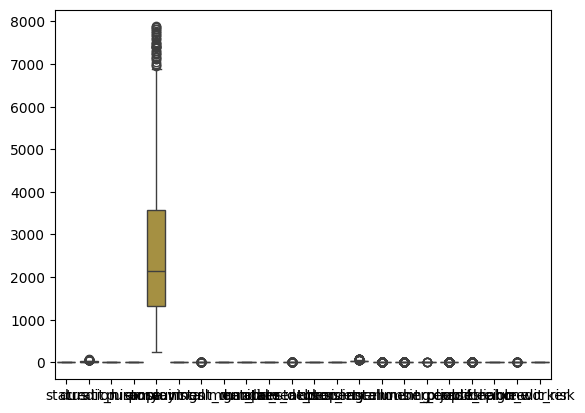

In [6]:
# Menghitung IQR
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

# Mendefinisikan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus nilai anomali
df = df[(df['amount'] > lower_bound) & (df['amount'] < upper_bound)]


# Plot boxplot setelah menghapus anomali
sns.boxplot(data=df)
plt.show()


Normalisasi dan Standarisasi:

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_normalized = MinMaxScaler().fit_transform(df)


Pembagian Data untuk Pelatihan dan Pengujian:

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Pemodelan Data

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Latih model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluasi Model

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7526881720430108
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.37      0.45        52
           1       0.79      0.90      0.84       134

    accuracy                           0.75       186
   macro avg       0.69      0.63      0.65       186
weighted avg       0.73      0.75      0.73       186

Confusion Matrix:
 [[ 19  33]
 [ 13 121]]


In [11]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


c:\Users\fajar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}


In [12]:
from sklearn.model_selection import cross_val_score

# Validasi silang
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


c:\Users\fajar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\fajar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\fajar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

Cross-validation scores: [0.76510067 0.74496644 0.77027027 0.78378378 0.77702703]
Mean CV score: 0.7682296390350082
